In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">Colorectal Cancer: EDA & Survival Prediction</p>

# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">Import Libraries</p>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">Import Dataset</p>

In [6]:
data = pd.read_csv("./dataset/colorectal_cancer_prediction.csv")

In [7]:
data.head()

,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
0,1,71,Male,Other,Europe,Urban,Middle,Yes,No,III,...,Yes,Delayed,Good,Yes,No,No,Good,Survived,No,16
1,2,34,Female,Black,North America,Urban,Middle,No,No,I,...,No,Timely,Good,No,Yes,Yes,Poor,Deceased,No,28
2,3,80,Female,White,North America,Urban,Middle,No,No,III,...,Yes,Timely,Limited,No,Yes,Yes,Good,Survived,No,26
3,4,40,Male,Black,North America,Rural,Low,No,No,I,...,Yes,Delayed,Limited,Yes,No,Yes,Poor,Deceased,No,44
4,5,43,Female,White,Europe,Urban,High,Yes,No,III,...,No,Delayed,Good,Yes,No,Yes,Poor,Deceased,Yes,20


In [8]:
data.tail()

,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
89940,89941,72,Male,White,North America,Urban,Middle,No,No,IV,...,Yes,Timely,Good,No,No,Yes,Poor,Deceased,No,25
89941,89942,59,Female,Asian,North America,Urban,Low,No,No,II,...,Yes,Delayed,Good,No,No,Yes,Good,Survived,No,46
89942,89943,77,Female,White,Africa,Rural,High,Yes,No,I,...,Yes,Delayed,Good,No,Yes,No,Good,Survived,Yes,41
89943,89944,37,Male,Other,North America,Rural,High,No,No,II,...,Yes,Timely,Limited,No,No,Yes,Good,Survived,No,47
89944,89945,69,Male,White,Europe,Urban,Middle,No,No,IV,...,Yes,Timely,Good,No,No,Yes,Good,Deceased,No,35


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               89945 non-null  int64  
 1   Age                      89945 non-null  int64  
 2   Gender                   89945 non-null  object 
 3   Race                     89945 non-null  object 
 4   Region                   89945 non-null  object 
 5   Urban_or_Rural           89945 non-null  object 
 6   Socioeconomic_Status     89945 non-null  object 
 7   Family_History           89945 non-null  object 
 8   Previous_Cancer_History  89945 non-null  object 
 9   Stage_at_Diagnosis       89945 non-null  object 
 10  Tumor_Aggressiveness     89945 non-null  object 
 11  Colonoscopy_Access       89945 non-null  object 
 12  Screening_Regularity     89945 non-null  object 
 13  Diet_Type                89945 non-null  object 
 14  BMI                   

In [10]:
data.describe()

,Patient_ID,Age,BMI,Time_to_Recurrence
count,89945.000000,89945.000000,89945.000000,89945.000000
mean,44973.000000,54.332892,29.268105,29.543299
std,25965.029318,20.182220,6.211668,17.268440
min,1.000000,20.000000,18.500000,0.000000
25%,22487.000000,37.000000,23.900000,15.000000
50%,44973.000000,54.000000,29.300000,30.000000
75%,67459.000000,72.000000,34.600000,44.000000
max,89945.000000,89.000000,40.000000,59.000000


In [11]:
data.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Race                       0
Region                     0
Urban_or_Rural             0
Socioeconomic_Status       0
Family_History             0
Previous_Cancer_History    0
Stage_at_Diagnosis         0
Tumor_Aggressiveness       0
Colonoscopy_Access         0
Screening_Regularity       0
Diet_Type                  0
BMI                        0
Physical_Activity_Level    0
Smoking_Status             0
Alcohol_Consumption        0
Red_Meat_Consumption       0
Fiber_Consumption          0
Insurance_Coverage         0
Time_to_Diagnosis          0
Treatment_Access           0
Chemotherapy_Received      0
Radiotherapy_Received      0
Surgery_Received           0
Follow_Up_Adherence        0
Survival_Status            0
Recurrence                 0
Time_to_Recurrence         0
dtype: int64

In [12]:
data.isnull().sum().sum()

0

In [13]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient_ID,89945.0,NaN,NaN,NaN,44973.0,25965.029318,1.0,22487.0,44973.0,67459.0,89945.0
Age,89945.0,NaN,NaN,NaN,54.332892,20.18222,20.0,37.0,54.0,72.0,89.0
Gender,89945,2,Male,49369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,89945,5,White,44887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,89945,5,North America,31537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Urban_or_Rural,89945,2,Urban,62990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Socioeconomic_Status,89945,3,Middle,45088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_History,89945,2,No,67372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Previous_Cancer_History,89945,2,No,80985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage_at_Diagnosis,89945,4,II,26869,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data.shape

(89945, 30)

In [15]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Race', 'Region', 'Urban_or_Rural',
       'Socioeconomic_Status', 'Family_History', 'Previous_Cancer_History',
       'Stage_at_Diagnosis', 'Tumor_Aggressiveness', 'Colonoscopy_Access',
       'Screening_Regularity', 'Diet_Type', 'BMI', 'Physical_Activity_Level',
       'Smoking_Status', 'Alcohol_Consumption', 'Red_Meat_Consumption',
       'Fiber_Consumption', 'Insurance_Coverage', 'Time_to_Diagnosis',
       'Treatment_Access', 'Chemotherapy_Received', 'Radiotherapy_Received',
       'Surgery_Received', 'Follow_Up_Adherence', 'Survival_Status',
       'Recurrence', 'Time_to_Recurrence'],
      dtype='object')

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar(feature, title, top_n=None):
    """
    Plots a bar chart for the given categorical feature.
    
    Parameters:
        feature (str): Column name in the dataframe.
        title (str): Title of the plot.
        top_n (int, optional): Number of top categories to display.
    """
    # Step 1: Compute value counts
    value_counts = data[feature].value_counts()

    # Step 2: Select top N categories if specified
    if top_n:
        value_counts = value_counts.head(top_n)

    # Step 3: Create the bar plot
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette="coolwarm")

    # Step 4: Customize plot aesthetics
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(axis='x', rotation=45)

    # Step 5: Show the plot
    plt.show()


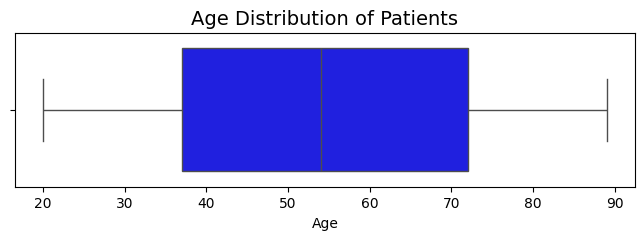

In [17]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=data["Age"], color="blue")
plt.title("Age Distribution of Patients", fontsize=14)
plt.xlabel("Age")
plt.show()

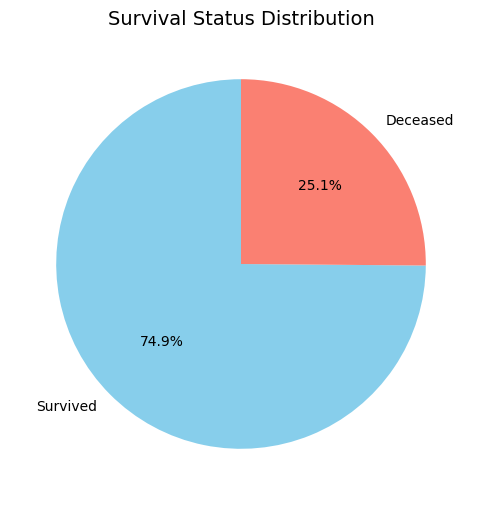

In [18]:
plt.figure(figsize=(6, 6))
data["Survival_Status"].value_counts().plot.pie(autopct="%1.1f%%", colors=["skyblue", "salmon"], startangle=90)
plt.title("Survival Status Distribution", fontsize=14)
plt.ylabel("")  # Hide y-label
plt.show()


C:\Users\SIAM\AppData\Local\Temp\ipykernel_1672\1852690653.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y="Stage_at_Diagnosis", order=data["Stage_at_Diagnosis"].value_counts().index, palette="coolwarm")


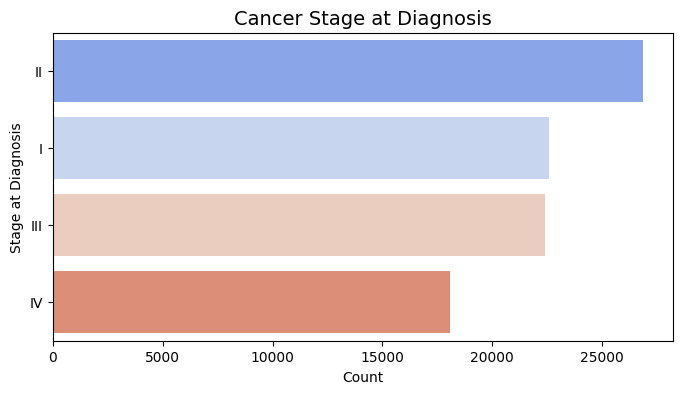

In [19]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, y="Stage_at_Diagnosis", order=data["Stage_at_Diagnosis"].value_counts().index, palette="coolwarm")
plt.title("Cancer Stage at Diagnosis", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Stage at Diagnosis")
plt.show()

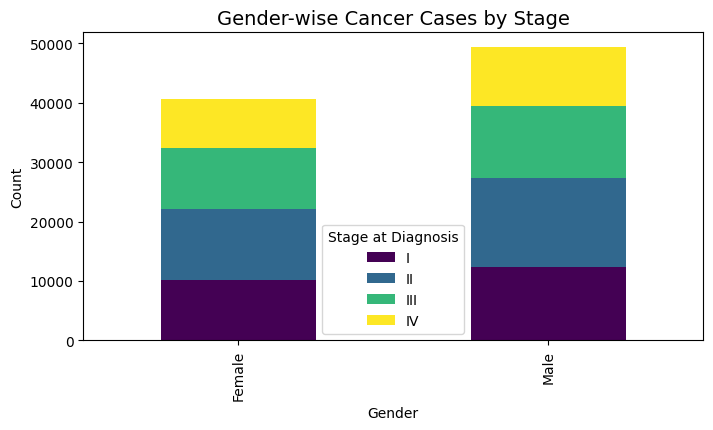

In [20]:
gender_stage = data.groupby(["Gender", "Stage_at_Diagnosis"]).size().unstack()
gender_stage.plot(kind="bar", stacked=True, figsize=(8, 4), colormap="viridis")
plt.title("Gender-wise Cancer Cases by Stage", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Stage at Diagnosis")
plt.show()

C:\Users\SIAM\AppData\Local\Temp\ipykernel_1672\279127146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, x="Region", y="Age", jitter=True, alpha=0.6, palette="husl")


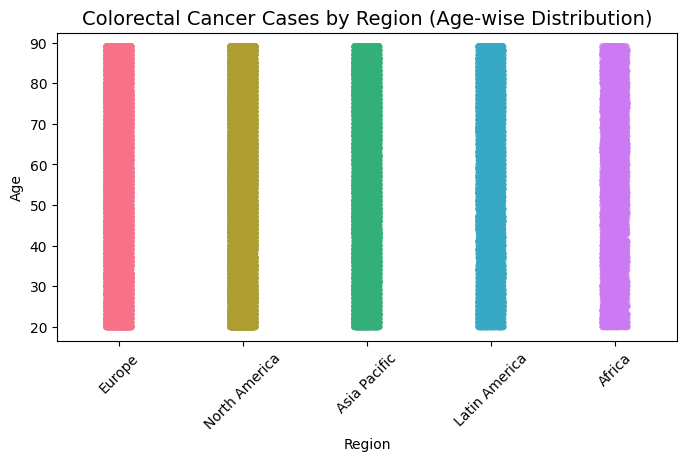

In [21]:
plt.figure(figsize=(8, 4))
sns.stripplot(data=data, x="Region", y="Age", jitter=True, alpha=0.6, palette="husl")
plt.title("Colorectal Cancer Cases by Region (Age-wise Distribution)", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Age")
plt.show()

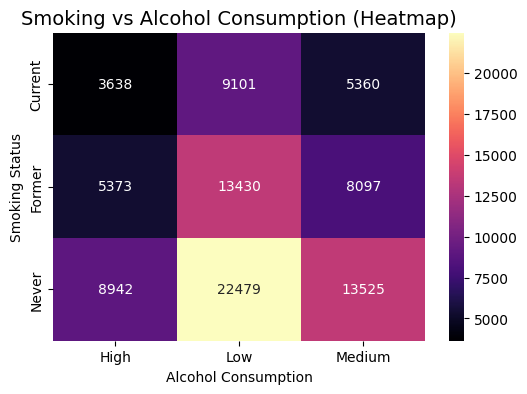

In [22]:
plt.figure(figsize=(6, 4))
cross_tab = pd.crosstab(data["Smoking_Status"], data["Alcohol_Consumption"])
sns.heatmap(cross_tab, annot=True, cmap="magma", fmt="d")
plt.title("Smoking vs Alcohol Consumption (Heatmap)", fontsize=14)
plt.ylabel("Smoking Status")
plt.xlabel("Alcohol Consumption")
plt.show()

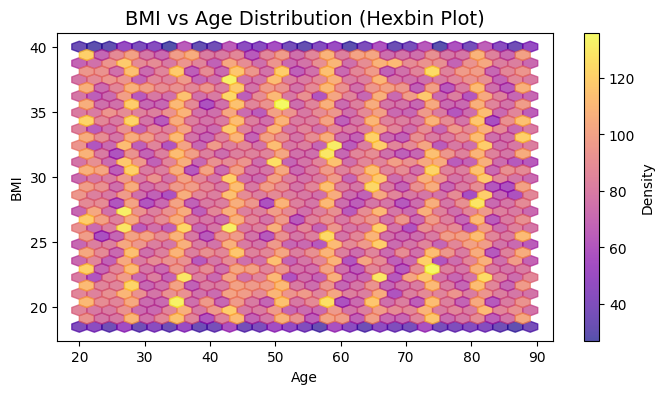

In [23]:
plt.figure(figsize=(8, 4))
plt.hexbin(data["Age"], data["BMI"], gridsize=30, cmap="plasma", alpha=0.7)
plt.colorbar(label="Density")
plt.title("BMI vs Age Distribution (Hexbin Plot)", fontsize=14)
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

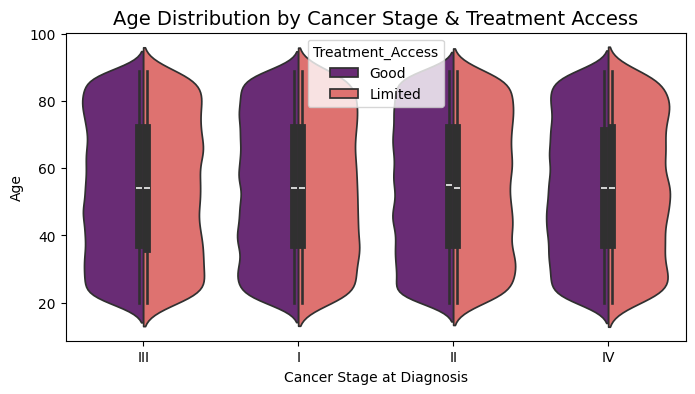

In [24]:
plt.figure(figsize=(8, 4))
sns.violinplot(data=data, x="Stage_at_Diagnosis", y="Age", hue="Treatment_Access", split=True, palette="magma")
plt.title("Age Distribution by Cancer Stage & Treatment Access", fontsize=14)
plt.xlabel("Cancer Stage at Diagnosis")
plt.ylabel("Age")
plt.show()


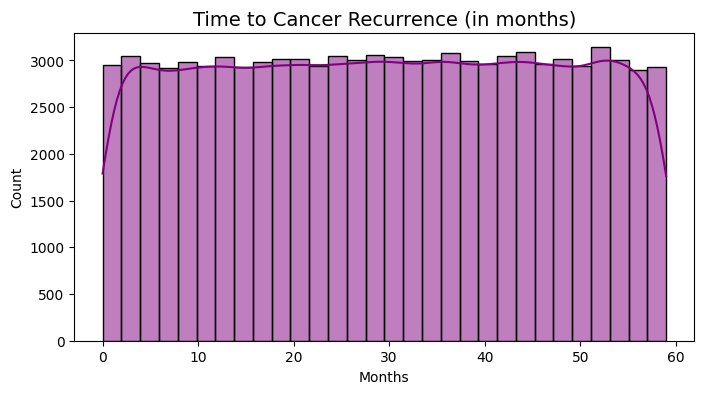

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(data["Time_to_Recurrence"], bins=30, kde=True, color="purple")
plt.title("Time to Cancer Recurrence (in months)", fontsize=14)
plt.xlabel("Months")
plt.ylabel("Count")
plt.show()

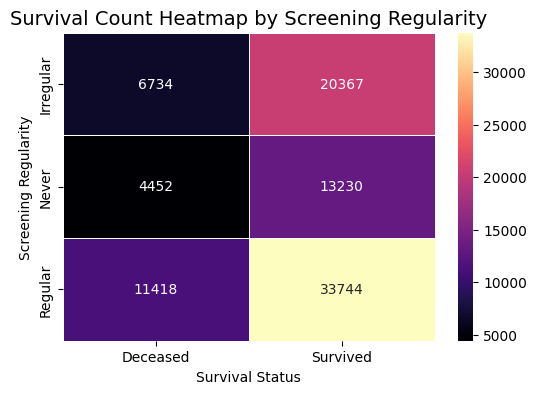

In [26]:
plt.figure(figsize=(6, 4))
heatmap_data = pd.crosstab(data["Screening_Regularity"], data["Survival_Status"])
sns.heatmap(heatmap_data, annot=True, cmap="magma", fmt="d", linewidths=0.5)
plt.title("Survival Count Heatmap by Screening Regularity", fontsize=14)
plt.xlabel("Survival Status")
plt.ylabel("Screening Regularity")
plt.show()

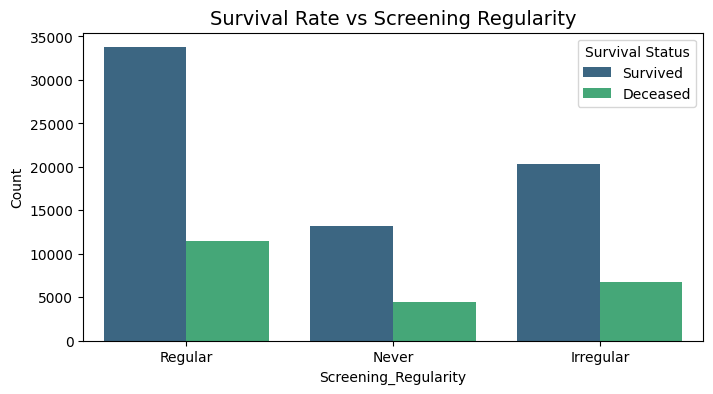

In [27]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x="Screening_Regularity", hue="Survival_Status", palette="viridis")
plt.title("Survival Rate vs Screening Regularity", fontsize=14)
plt.ylabel("Count")
plt.legend(title="Survival Status")
plt.show()

## Thank you!!! Pls Upvote...